# Turbulent Mixing Layer Example
This is an example of using the Turbulent Mixing Layer flow
A two-dimensional flow is initialized with flow on the bottom and simulated. Afterwards, the energy and the velocity field is plotted.

In [1]:
import lettuce as lt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import torch

In [2]:
nmax     = 100000
nconsole = 1000
nreport  = 500
epsilon  = 0.0001 # convergence condition: .01 % relative change

In [3]:
def run_n_plot(Re):
    lattice = lt.Lattice(lt.D2Q9, device = torch.device("cuda"), dtype=torch.float64, use_native=False)
    flow = lt.TurbulentMixing2D(resolution=64, reynolds_number=Re, mach_number=0.1, lattice=lattice)
    collision = lt.KBCCollision2D(lattice, tau=flow.units.relaxation_parameter_lu)
    streaming = lt.StandardStreaming(lattice)
    simulation = lt.Simulation(flow=flow, lattice=lattice, collision=collision, streaming=streaming)

    Energy = lt.IncompressibleKineticEnergy(lattice, flow)
    energy_reporter_internal = lt.ObservableReporter(Energy, interval=nreport, out=None)
    simulation.reporters.append(energy_reporter_internal)
    simulation.reporters.append(lt.ObservableReporter(Energy, interval=nconsole)) # print energy
    simulation.reporters.append(lt.VTKReporter(lattice, flow, interval=nreport, filename_base="./data/turbulence_period_64_Re" + "{:.1e}".format(Re) + "/out"))

    simulation.initialize_f_neq()
    energy_new = 0
    mlups = 0
    i_plot = 10
    iterations = int(nmax//nconsole)
    for i in range(iterations):
        energy_old = energy_new
        energy_new = Energy(simulation.f).mean()
        if i%i_plot == 0:
            u_x = flow.units.convert_velocity_to_pu(lattice.u(simulation.f)).cpu().numpy()[0].transpose()
            plt.imshow(u_x, cmap=mpl.colormaps['RdBu'])
            plt.title("Re: " + "{:.1e}".format(Re) + ", " + str(i*nconsole) + " steps, " + str(flow.units.convert_time_to_pu(i*nconsole)) + " seconds")
            plt.show()
        mlups += simulation.step(nconsole)
        if abs((energy_new - energy_old)/energy_new) < epsilon:
            print("CONVERGENCE! Less than ", epsilon*100, " % relative change")
            break
        if not energy_new == energy_new:
            print("CRASHED! Received nan values")
            break
    print("avg MLUPS: ", mlups/iterations)
    return simulation

steps     time     IncompressibleKineticEnergy
steps     time     IncompressibleKineticEnergy


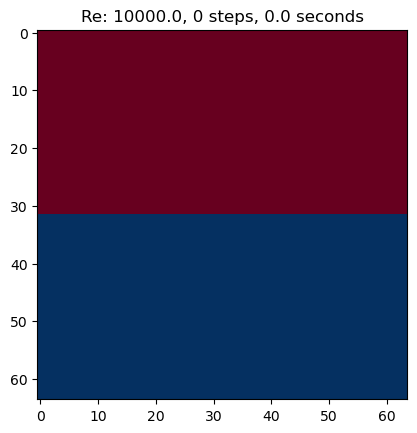

0 0.0 0.2499999999999993


/home/philipp/lettuce/lettuce/simulation.py:122: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/TensorCompare.cpp:493.)
  self.f = torch.where(self.collision.no_collision_mask, self.f, self.collision(self.f))


1000 0.9021097956087903 0.24254178297667817
2000 1.8042195912175807 0.2393703156696106
3000 2.706329386826371 0.2369410520353772
4000 3.6084391824351614 0.2348968690352042
5000 4.510548978043952 0.23309864831673863
6000 5.412658773652742 0.23147404008678776
7000 6.314768569261532 0.2299807153670022
8000 7.216878364870323 0.22859148371551946
9000 8.118988160479113 0.22728724572500142
10000 9.021097956087903 0.22605421274154008


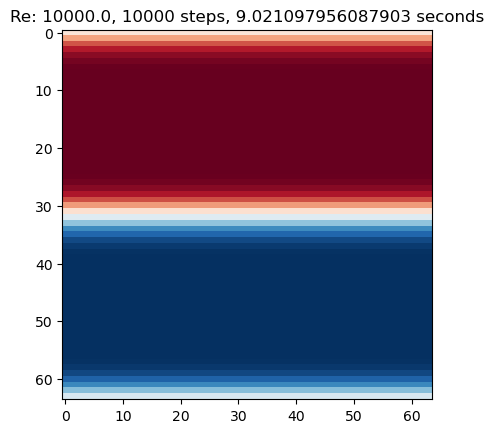

11000 9.923207751696694 0.2248816908881296
12000 10.825317547305485 0.22376153986932754
13000 11.727427342914275 0.22268738143945477
14000 12.629537138523064 0.22165399535233657
15000 13.531646934131855 0.22065714233689745
16000 14.433756729740645 0.21969310603154604
17000 15.335866525349436 0.21875882899567015
18000 16.237976320958225 0.21785176144608226
19000 17.140086116567016 0.21696966097513198
20000 18.042195912175806 0.21611060570262083


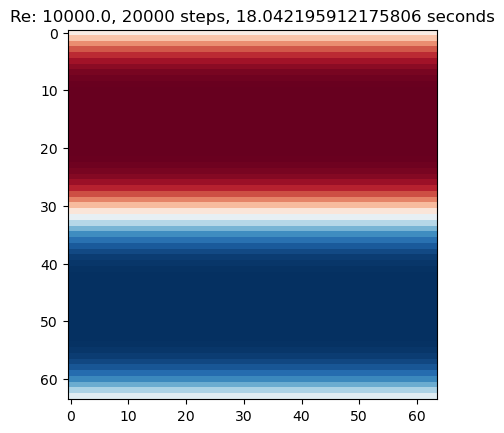

21000 18.944305707784597 0.21527284400239988
22000 19.846415503393388 0.2144548614287442
23000 20.74852529900218 0.21365533524105898
24000 21.65063509461097 0.2128730718278895
25000 22.55274489021976 0.21210700735087185
26000 23.45485468582855 0.21135615683903117
27000 24.35696448143734 0.2106196401309044
28000 25.25907427704613 0.20989666729577613
29000 26.16118407265492 0.20918651416239797
30000 27.06329386826371 0.2084885213861155


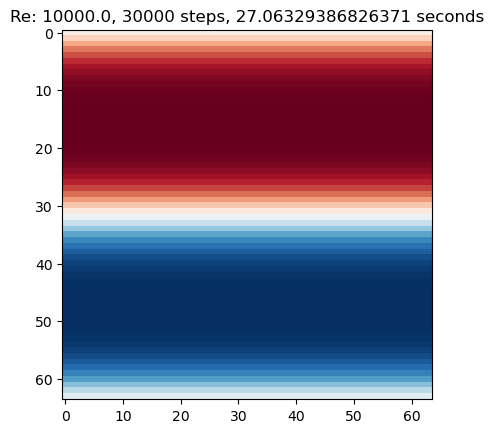

31000 27.9654036638725 0.20780207656084848
32000 28.86751345948129 0.20712661998845397
33000 29.76962325509008 0.2064616413975838
34000 30.671733050698872 0.20580666609499398
35000 31.573842846307663 0.20516125887451947
36000 32.47595264191645 0.20452501024777045
37000 33.378062437525244 0.20389754185142353
38000 34.28017223313403 0.20327850292493474
39000 35.182282028742826 0.20266756652054074
40000 36.08439182435161 0.2020644276547406


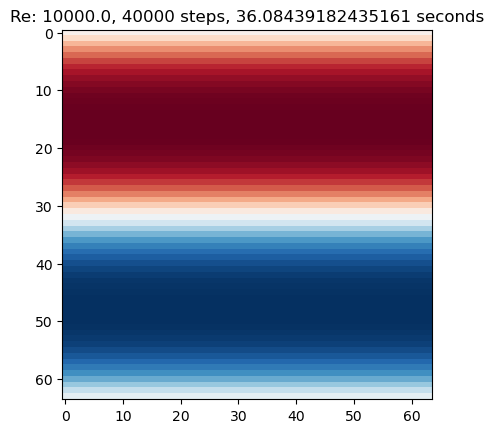

41000 36.98650161996041 0.20146880031820252
42000 37.888611415569194 0.200880417557789
43000 38.79072121117799 0.2002990306514795
44000 39.692831006786776 0.19972440622497029
45000 40.59494080239556 0.1991563271050803
46000 41.49705059800436 0.198594587449896
47000 42.399160393613144 0.19803899596150684
48000 43.30127018922194 0.19748937225969113
49000 44.203379984830725 0.19694554675450468
50000 45.10548978043952 0.1964073602157244


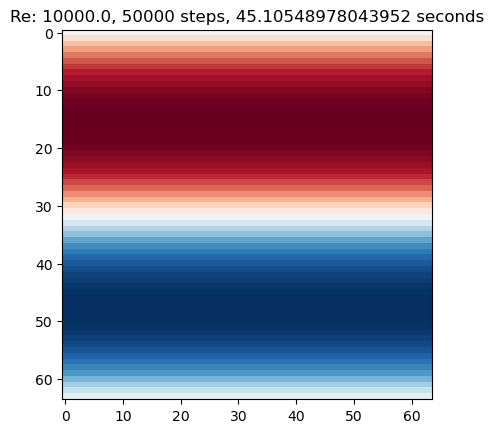

51000 46.00759957604831 0.19587466203552636
52000 46.9097093716571 0.19534730987846555
53000 47.81181916726589 0.19482516988421242
54000 48.71392896287468 0.19430811520162775
55000 49.61603875848347 0.19379602570886678
56000 50.51814855409226 0.1932887882580179
57000 51.42025834970105 0.1927862948451681
58000 52.32236814530984 0.19228844323466243
59000 53.22447794091863 0.1917951363534165
60000 54.12658773652742 0.19130628164375638


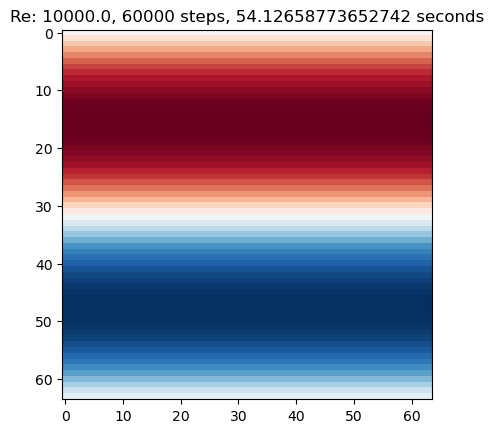

61000 55.02869753213621 0.1908217913531785
62000 55.930807327745 0.1903415816370899
63000 56.832917123353795 0.18986557211579827
64000 57.73502691896258 0.18939368622662495
65000 58.637136714571376 0.18892585022388814
66000 59.53924651018016 0.1884619940492215
67000 60.44135630578895 0.1880020496676836
68000 61.343466101397745 0.18754595194282728
69000 62.24557589700653 0.18709363829087725
70000 63.147685692615326 0.1866450482915852


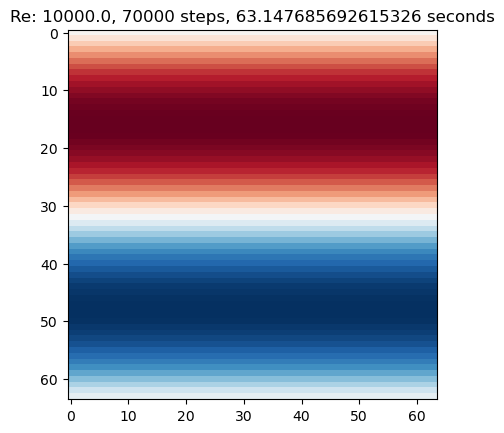

71000 64.04979548822412 0.1862001237544292
72000 64.9519052838329 0.18575880854906682
73000 65.8540150794417 0.18532104838935623
74000 66.75612487505049 0.1848867908646649
75000 67.65823467065928 0.18445598540397382
76000 68.56034446626806 0.18402858311395545
77000 69.46245426187686 0.18360453682919553
78000 70.36456405748565 0.18318380078259697
79000 71.26667385309443 0.18276633049949811
80000 72.16878364870323 0.1823520829355366


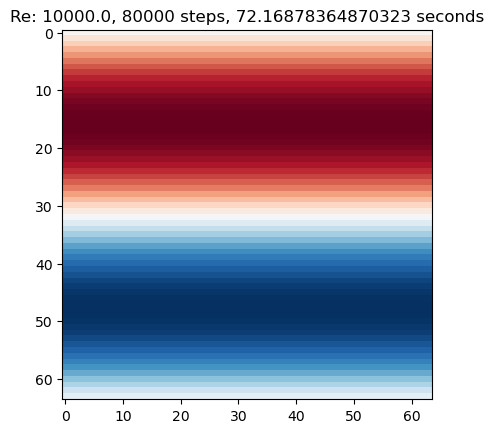

81000 73.07089344431202 0.18194101684151756
82000 73.97300323992081 0.1815330920680906
83000 74.8751130355296 0.1811282696660068
84000 75.77722283113839 0.18072651201287662
85000 76.67933262674718 0.18032778272135339
86000 77.58144242235598 0.17993204661481624
87000 78.48355221796476 0.17953926975161086
88000 79.38566201357355 0.17914941938997098
89000 80.28777180918235 0.17876246386254033
90000 81.18988160479113 0.17837837253787928


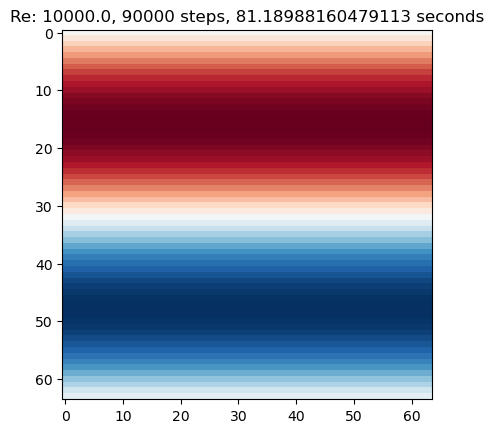

91000 82.09199140039992 0.17799711582686978
92000 82.99410119600871 0.17761866515337688
93000 83.89621099161751 0.17724299292210116
94000 84.79832078722629 0.17687007246477787
95000 85.70043058283508 0.17649987793722147
96000 86.60254037844388 0.17613238427115227
97000 87.50465017405267 0.1757675672937102
98000 88.40675996966145 0.1754054036648503
99000 89.30886976527025 0.17504587075401334
100000 90.21097956087904 0.17468894661533457
avg MLUPS:  3.389409751409394


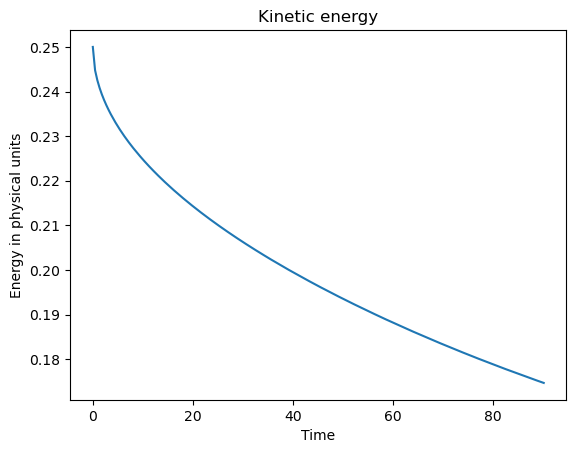

steps     time     IncompressibleKineticEnergy
steps     time     IncompressibleKineticEnergy


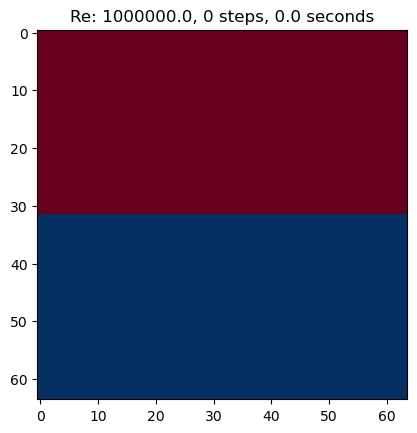

0 0.0 0.2499999999999993
1000 0.9021097956087903 0.24831845375138406
2000 1.8042195912175807 0.24822667316907868
3000 2.706329386826371 0.2481269735401117
4000 3.6084391824351614 0.2480266176719814
5000 4.510548978043952 0.24793371046441506
6000 5.412658773652742 0.24784566456030746
7000 6.314768569261532 0.2477499375585837
8000 7.216878364870323 0.24765682604632314
9000 8.118988160479113 0.2475696914760819
10000 9.021097956087903 0.2474837993494611


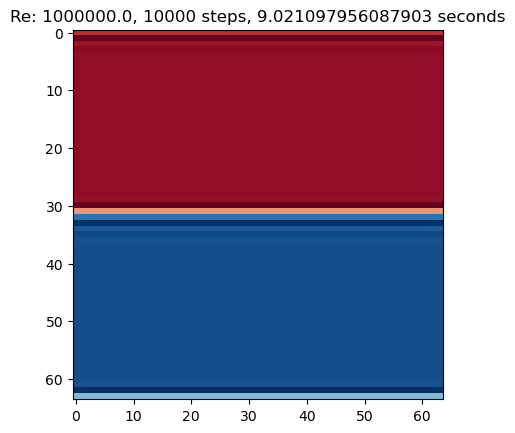

11000 9.923207751696694 0.24740176394730418
12000 10.825317547305485 0.24731623427923927
13000 11.727427342914275 0.24723176355311702
14000 12.629537138523064 0.2471441484831871
15000 13.531646934131855 0.2470758097047689
16000 14.433756729740645 0.24700226057207036
17000 15.335866525349436 0.24692001757447316
18000 16.237976320958225 0.24683991426691992
19000 17.140086116567016 0.24676921328753554
20000 18.042195912175806 0.24669349976392865


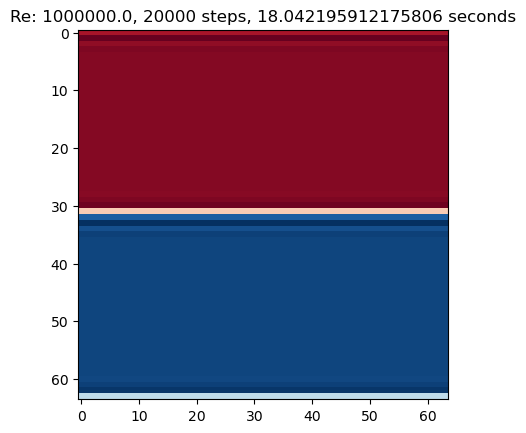

21000 18.944305707784597 0.24662085684053953
22000 19.846415503393388 0.24655530495856087
23000 20.74852529900218 0.24648133964992125
24000 21.65063509461097 0.24641191020185688
25000 22.55274489021976 0.2463467207526355
26000 23.45485468582855 0.24627918562439152
27000 24.35696448143734 0.24621206157101563
28000 25.25907427704613 0.24614706689223753
29000 26.16118407265492 0.24607905280621314
30000 27.06329386826371 0.24601801550620103


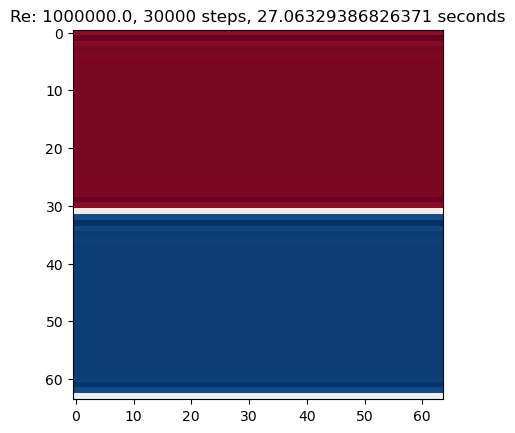

31000 27.9654036638725 0.24595599737992882
32000 28.86751345948129 0.24589544923239445
33000 29.76962325509008 0.24582783346368867
34000 30.671733050698872 0.2457684666879345
35000 31.573842846307663 0.24570831012112587
36000 32.47595264191645 0.24564733482047166
37000 33.378062437525244 0.24558887988703965
38000 34.28017223313403 0.24552927647664047
39000 35.182282028742826 0.24546881990526268
40000 36.08439182435161 0.2454098871141563


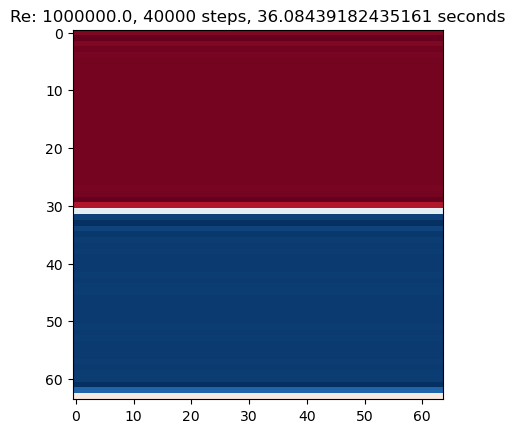

41000 36.98650161996041 0.24535913582008112
42000 37.888611415569194 0.24529994076444347
43000 38.79072121117799 0.24523713553164875
44000 39.692831006786776 0.24518087380676726
45000 40.59494080239556 0.24512707255128324
46000 41.49705059800436 0.2450671240466585
47000 42.399160393613144 0.24501892393304217
48000 43.30127018922194 0.24495944453693824
49000 44.203379984830725 0.2449015789495427
50000 45.10548978043952 0.24485686909530263


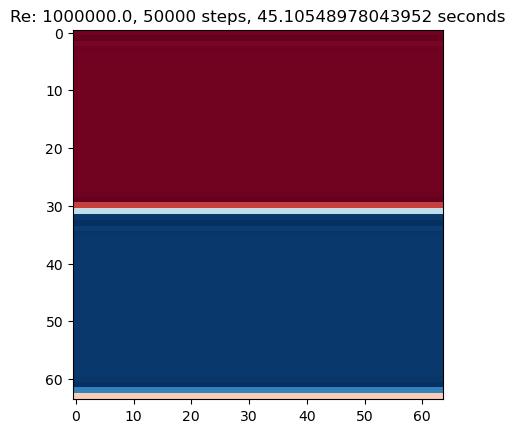

51000 46.00759957604831 0.24480241686492132
52000 46.9097093716571 0.24474627443049177
53000 47.81181916726589 0.2446931549767952
54000 48.71392896287468 0.2446389815118012
55000 49.61603875848347 0.24459210861913777
56000 50.51814855409226 0.2445371358538777
57000 51.42025834970105 0.24448755587018867
58000 52.32236814530984 0.24443747932659618
59000 53.22447794091863 0.24438181033684458
60000 54.12658773652742 0.24433426768304503


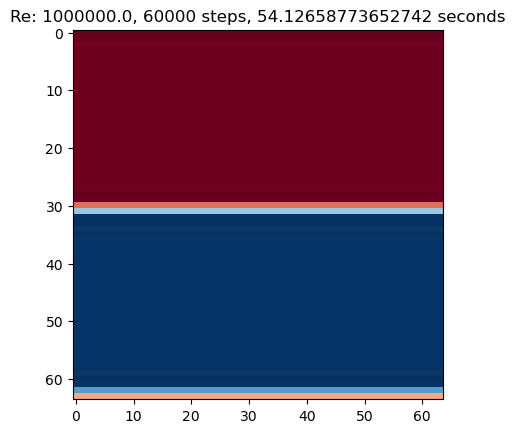

61000 55.02869753213621 0.24428396174035652
62000 55.930807327745 0.24423592119422663
63000 56.832917123353795 0.24418711654247477
64000 57.73502691896258 0.24413832858920803
65000 58.637136714571376 0.2440926950216319
66000 59.53924651018016 0.24404608255507126
67000 60.44135630578895 0.24400298174223928
68000 61.343466101397745 0.24395383886380648
69000 62.24557589700653 0.24390438714491305
70000 63.147685692615326 0.24386332330438068


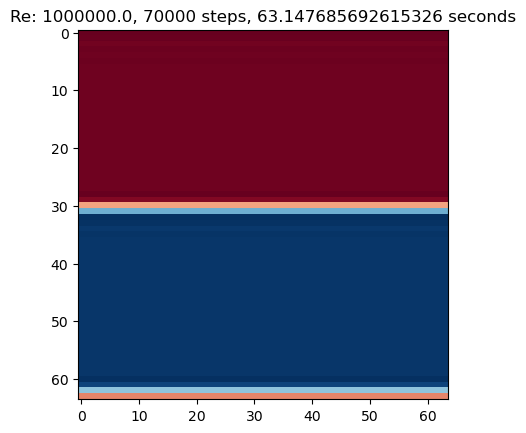

71000 64.04979548822412 0.24382014217580195
72000 64.9519052838329 0.24377244089499758
73000 65.8540150794417 0.24372907899509755
74000 66.75612487505049 0.24368472984199713
75000 67.65823467065928 0.24364193511105206
76000 68.56034446626806 0.24359906372453366
77000 69.46245426187686 0.24355669707939803
78000 70.36456405748565 0.24351338838974182
79000 71.26667385309443 0.24347020125575006
80000 72.16878364870323 0.2434286578803795


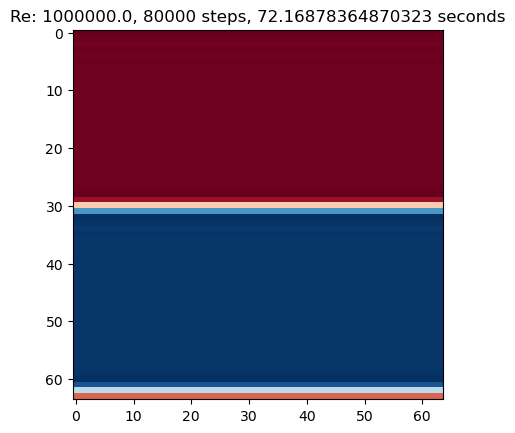

81000 73.07089344431202 0.2433877680196697
82000 73.97300323992081 0.24334710891814632
83000 74.8751130355296 0.24330708932797301
84000 75.77722283113839 0.2432622136435823
85000 76.67933262674718 0.24321956188185695
86000 77.58144242235598 0.24318360453282553
87000 78.48355221796476 0.2431433484255938
88000 79.38566201357355 0.24310107880801324
89000 80.28777180918235 0.24306070210675917
90000 81.18988160479113 0.24302202193637107


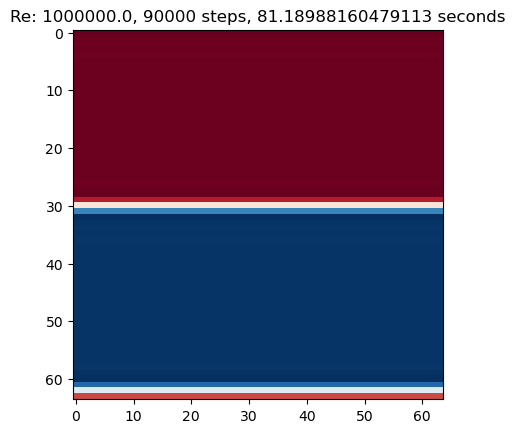

91000 82.09199140039992 0.24298329852991934
92000 82.99410119600871 0.24294291890625064
93000 83.89621099161751 0.24290509288985215
94000 84.79832078722629 0.242861528360974
95000 85.70043058283508 0.24282283598871585
96000 86.60254037844388 0.24278665824656143
97000 87.50465017405267 0.24274564375105578
98000 88.40675996966145 0.24270543660382252
99000 89.30886976527025 0.24266558783860448
100000 90.21097956087904 0.242627342664955
avg MLUPS:  3.3943220700978554


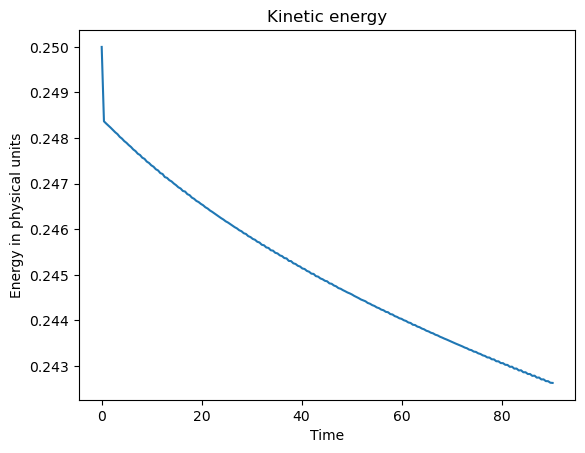

In [4]:
for Re in [1e4, 1e6]:
    sim = run_n_plot(Re)
    energy = np.array(sim.reporters[0].out)
    plt.plot(energy[:,1],energy[:,2])
    plt.title('Kinetic energy')
    plt.xlabel('Time')
    plt.ylabel('Energy in physical units')
    plt.show()